# 🏏 IPL Stats Analyzer & Match Predictor

In [15]:
import pandas as pd
df = pd.read_csv('deliveries.csv')

**TOP 10 RUN GETTERS**

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


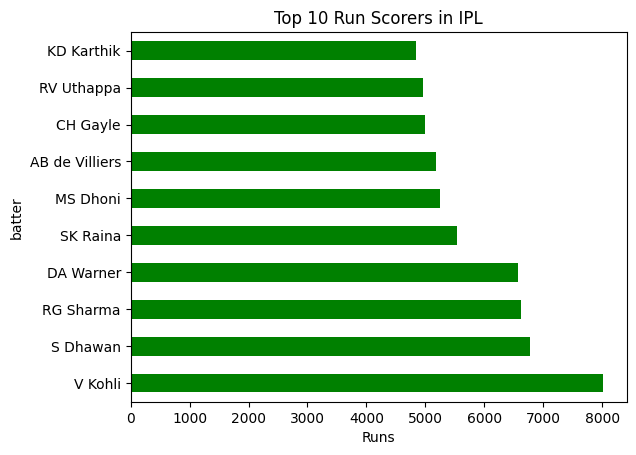

In [16]:
runs_by_player = df.groupby("batter")["batsman_runs"].sum().sort_values(ascending=False).head(10)
print(runs_by_player)

# Visualizing the top 10 run scorers in IPL
import matplotlib.pyplot as plt

runs_by_player.plot(kind="barh", color="green")
plt.xlabel("Runs")
plt.title("Top 10 Run Scorers in IPL")
plt.show()

**TOP 10 TEAMS WITH MOST WINS**

 Most Wins by Team:
 winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


C:\Users\shrit\AppData\Local\Temp\ipykernel_10804\1444013207.py:14: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shrit\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


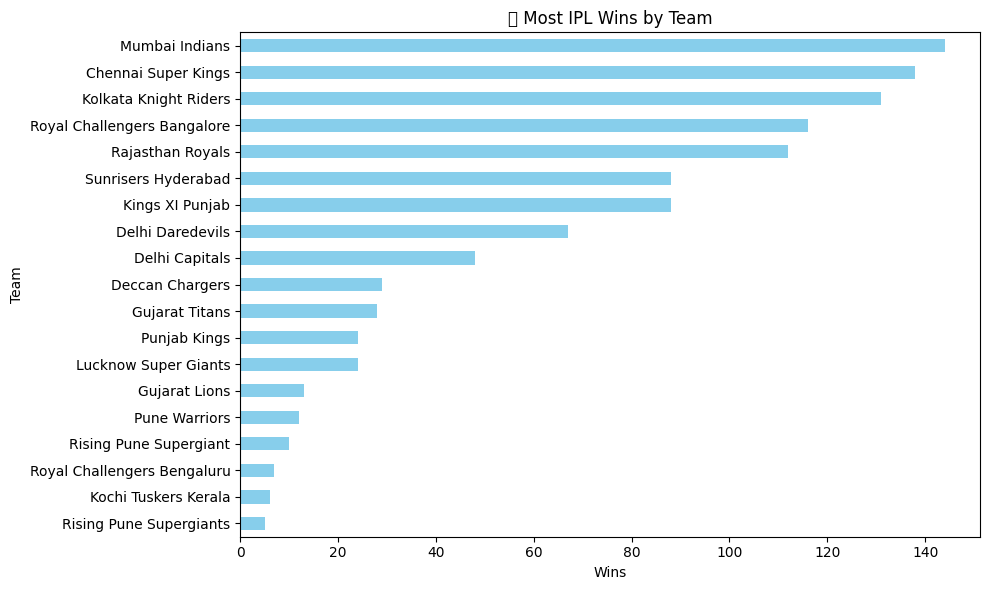

In [17]:
matches_df = pd.read_csv("matches.csv")

most_wins = matches_df['winner'].value_counts()

print(" Most Wins by Team:\n", most_wins)

# Visualizing the most wins by team in IPL
plt.figure(figsize=(10, 6))
most_wins.plot(kind='barh', color='skyblue')
plt.title("🏆 Most IPL Wins by Team")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**TEAM HEAD-2-HEAD**

In [18]:
team1 = input("Enter first team name (FULL NAME): ").strip()
team2 = input("Enter second team name (FULL NAME): ").strip()

mask = ((matches_df['team1'] == team1) & (matches_df['team2'] == team2)) | \
       ((matches_df['team1'] == team2) & (matches_df['team2'] == team1))

head_to_head = matches_df[mask]

if head_to_head.empty:
    print(f"❌ No matches found between {team1} and {team2}.")
else:
    last_5_matches = head_to_head.sort_values(by='date', ascending=False).head(5)

    print(f"\n📊 Last {len(last_5_matches)} head-to-head matches between {team1} and {team2}:\n")
    for i, row in last_5_matches.iterrows():
        print(f"🗓️ {row['date']} - Winner: {row['winner']}")

    # Step 5: Show TOTAL head-to-head win summary
    win_summary = head_to_head['winner'].value_counts()
    print("\n🏆 Total Head-to-Head Wins (All Time):")
    print(win_summary)


📊 Last 5 head-to-head matches between Rajasthan Royals and Chennai Super Kings:

🗓️ 2024-05-12 - Winner: Chennai Super Kings
🗓️ 2023-04-27 - Winner: Rajasthan Royals
🗓️ 2023-04-12 - Winner: Rajasthan Royals
🗓️ 2022-05-20 - Winner: Rajasthan Royals
🗓️ 2021-10-02 - Winner: Rajasthan Royals

🏆 Total Head-to-Head Wins (All Time):
winner
Chennai Super Kings    16
Rajasthan Royals       13
Name: count, dtype: int64


**BATSMAN BOWLER HEAD-2-HEAD**

In [19]:
user_batsman_input = input("Enter Batsman Name (Refer the csv files for correct name format): ")
user_bowler_input = input("Enter Bowler Name (Refer the csv files for correct name format): ")

batsman = user_batsman_input.strip()
bowler = user_bowler_input.strip()

battle_df = df[(df['batter'] == batsman) & (df['bowler'] == bowler)]

balls_faced = battle_df.shape[0]
runs_scored = battle_df['batsman_runs'].sum()
dismissals = df[(df['bowler'] == bowler) & (df['player_dismissed'] == batsman)].shape[0]

strike_rate = (runs_scored / balls_faced * 100) if balls_faced > 0 else 0
average = (runs_scored / dismissals) if dismissals > 0 else "∞"

print(f"\n📊 Batsman vs Bowler: {user_batsman_input} vs {user_bowler_input}")
print(f"➡️ Balls Faced     : {balls_faced}")
print(f"➡️ Runs Scored     : {runs_scored}")
print(f"➡️ Strike Rate     : {round(strike_rate, 2)}")
print(f"➡️ Times Dismissed : {dismissals}")
print(f"➡️ Batting Average : {round(average, 2) if average != '∞' else '∞'}")



📊 Batsman vs Bowler: MS Dhoni vs B Kumar
➡️ Balls Faced     : 61
➡️ Runs Scored     : 94
➡️ Strike Rate     : 154.1
➡️ Times Dismissed : 0
➡️ Batting Average : ∞


**WINNER PREDICTOR**

Logic nd Formula

This feature predicts the winner between two IPL teams using **rule-based logic**. No machine learning is used — just smart analysis of past data.


**🔢 Factors Considered:**

| Factor         | Description                                                                 | Weight |
|----------------|-----------------------------------------------------------------------------|--------|
| **Head-to-Head Record** | Historical win percentage between the two teams                          | 40%    |
| **Recent Form**         | Number of matches won by each team in their last 5 games              | 30%    |
| **Toss Winner**         | Which team won the toss (optional input, gives slight advantage)     | 30%    |

**📘 Formula:**

Let:

- `H2H%_A` = Percentage of matches won by Team A against Team B  
- `Recent%_A` = Win percentage of Team A in their last 5 matches  
- `Toss%_A` = 100 if Team A won the toss, else 0  
(Same for Team B)

Then:

Final_Score_A = 0.4 × H2H%_A + 0.3 × Recent%_A + 0.3 × Toss%_A  
Final_Score_B = 0.4 × H2H%_B + 0.3 × Recent%_B + 0.3 × Toss%_B
```

The team with the **higher final score** is predicted as the winner.

In [20]:
import pandas as pd

df = pd.read_csv('matches.csv')

teams = pd.unique(df[['team1', 'team2']].values.ravel())

def win_predictor(team_a, team_b, toss_winner=None):
    # Head-to-Head
    h2h_matches = df[((df['team1'] == team_a) & (df['team2'] == team_b)) |
                     ((df['team1'] == team_b) & (df['team2'] == team_a))]

    h2h_wins_a = (h2h_matches['winner'] == team_a).sum()
    h2h_wins_b = (h2h_matches['winner'] == team_b).sum()

    h2h_total = h2h_wins_a + h2h_wins_b
    h2h_score_a = (h2h_wins_a / h2h_total) * 100 if h2h_total else 50
    h2h_score_b = 100 - h2h_score_a

    # Recent Form (last 5 matches each)
    recent_a = df[(df['team1'] == team_a) | (df['team2'] == team_a)].tail(5)
    recent_b = df[(df['team1'] == team_b) | (df['team2'] == team_b)].tail(5)

    recent_wins_a = (recent_a['winner'] == team_a).sum()
    recent_wins_b = (recent_b['winner'] == team_b).sum()

    recent_score_a = (recent_wins_a / 5) * 100
    recent_score_b = (recent_wins_b / 5) * 100

    toss_score_a = 100 if toss_winner == team_a else 0
    toss_score_b = 100 if toss_winner == team_b else 0

    # Final Score Calculation
    final_a = 0.4 * h2h_score_a + 0.3 * recent_score_a + 0.3 * toss_score_a
    final_b = 0.4 * h2h_score_b + 0.3 * recent_score_b + 0.3 * toss_score_b

    print(f"\n📊 Scores:\n{team_a}: {final_a:.2f}\n{team_b}: {final_b:.2f}")
    if (final_a == final_b):
        print("❗️ Cannot predict a winner")
        return
    winner = team_a if final_a > final_b else team_b
    print(f"\n🏆 Predicted Winner: {winner}\n")

# ----------- User Input Section ------------

print("📋 Available Teams:")
for t in sorted(teams): print("-", t)

team_a = input("\nEnter Team A name: ").strip()
team_b = input("Enter Team B name: ").strip()

# Check if valid
if team_a not in teams or team_b not in teams:
    print("❌ Invalid team name. Please check spelling.")
else:
    toss = input(f"Who won the toss? ({team_a}/{team_b}/leave empty): ").strip()
    toss_winner = toss if toss in [team_a, team_b] else None
    win_predictor(team_a, team_b, toss_winner)


📋 Available Teams:
- Chennai Super Kings
- Deccan Chargers
- Delhi Capitals
- Delhi Daredevils
- Gujarat Lions
- Gujarat Titans
- Kings XI Punjab
- Kochi Tuskers Kerala
- Kolkata Knight Riders
- Lucknow Super Giants
- Mumbai Indians
- Pune Warriors
- Punjab Kings
- Rajasthan Royals
- Rising Pune Supergiant
- Rising Pune Supergiants
- Royal Challengers Bangalore
- Royal Challengers Bengaluru
- Sunrisers Hyderabad

📊 Scores:
Royal Challengers Bangalore: 25.33
Chennai Super Kings: 38.67

🏆 Predicted Winner: Chennai Super Kings



**PLAYER PERFORMANCE VS THE TEAM**

In [25]:
import pandas as pd

df = pd.read_csv('deliveries.csv')

batsman_name = input("Enter Batsman Name: ").strip()
bowling_team = input("Enter Opponent Team Name: ").strip()

df_player_vs_team = df[(df['batter'] == batsman_name) & (df['bowling_team'] == bowling_team)]

match_stats = df_player_vs_team.groupby('match_id').agg({
    'batsman_runs': 'sum',
    'ball': 'count',
    'player_dismissed': lambda x: batsman_name in x.values
}).reset_index()

match_stats.rename(columns={'ball': 'balls_faced', 'player_dismissed': 'out'}, inplace=True)

last_5 = match_stats.sort_values(by='match_id', ascending=False).head(5)

print(f"\n📝 Last 5 Performances of {batsman_name} vs {bowling_team}:\n")
for i, row in last_5.iterrows():
    status = "Out" if row['out'] else "Not Out"
    print(f"🏏 Runs: {row['batsman_runs']} ({row['balls_faced']}) | {status}")

total_runs = match_stats['batsman_runs'].sum()
total_balls = match_stats['balls_faced'].sum()
dismissals = match_stats['out'].sum()

strike_rate = round((total_runs / total_balls) * 100, 2) if total_balls else 0
batting_avg = round(total_runs / dismissals, 2) if dismissals else "NA (Not Out in all)"

print("\n📊 Overall Summary:")
print(f"Total Runs: {total_runs}")
print(f"Strike Rate: {strike_rate}")
print(f"Average: {batting_avg}")



📝 Last 5 Performances of V Kohli vs Mumbai Indians:

🏏 Runs: 3 (9) | Out
🏏 Runs: 1 (4) | Out
🏏 Runs: 82 (53) | Not Out
🏏 Runs: 48 (36) | Out
🏏 Runs: 51 (44) | Out

📊 Overall Summary:
Total Runs: 860
Strike Rate: 123.03
Average: 31.85
